## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Data Cleaning

In [5]:
data.shape

(614, 13)

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

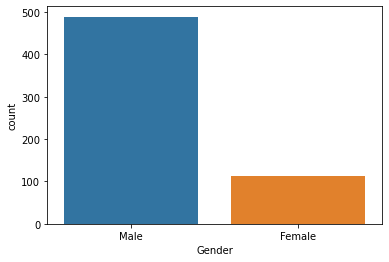

In [8]:
sns.countplot(data = data, x ='Gender')
plt.show()

In [9]:
data.Gender.fillna(data.Gender.mode()[0], inplace=True)

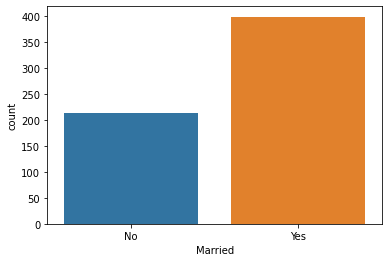

In [10]:
sns.countplot(data = data, x ='Married')
plt.show()

In [11]:
data.Married.fillna(data.Married.mode()[0], inplace=True)

In [12]:
data.Dependents.fillna(data.Dependents.mode()[0], inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace=True)

In [13]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data.LoanAmount.fillna(data.LoanAmount.mode()[0], inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace=True)

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Visualization

In [16]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

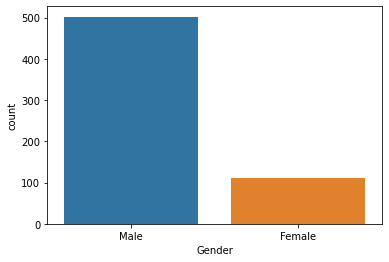

In [17]:
sns.countplot(data=data, x="Gender")
plt.show()

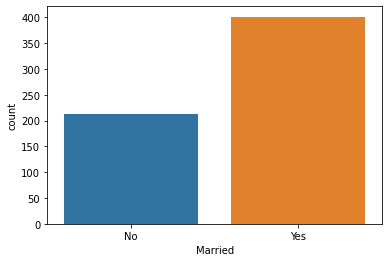

In [18]:
sns.countplot(data=data, x="Married")
plt.show()

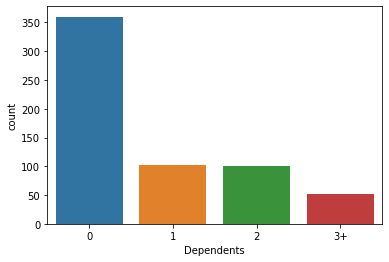

In [19]:
sns.countplot(data=data, x="Dependents")
plt.show()

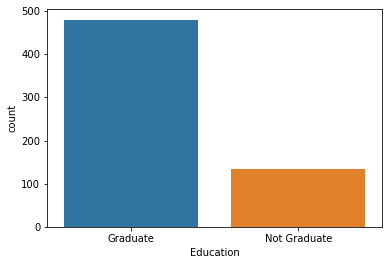

In [20]:
sns.countplot(data=data, x="Education")
plt.show()

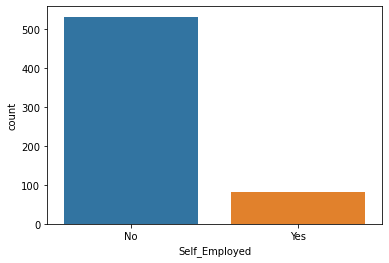

In [21]:
sns.countplot(data=data, x="Self_Employed")
plt.show()

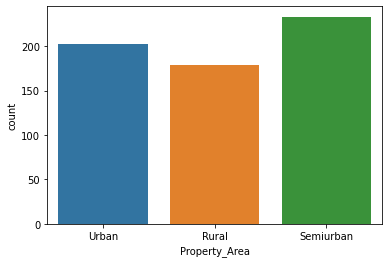

In [22]:
sns.countplot(data=data, x="Property_Area")
plt.show()

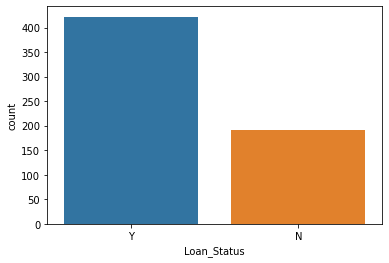

In [23]:
sns.countplot(data=data, x="Loan_Status")
plt.show()

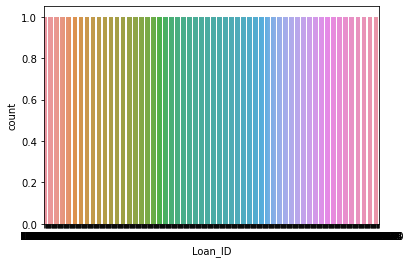

In [24]:
sns.countplot(data=data, x="Loan_ID")
plt.show()

In [25]:
data.drop('Loan_ID', axis=1, inplace=True)

In [26]:
x = data.drop('Loan_Status', axis=1)
y = data.Loan_Status

## Model Building

In [27]:
x = pd.get_dummies(x, drop_first=False)
x

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       120.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               1.0              0            1           1            0   
1               1.0              0            1           0            1   
2               1.0              0            1           0            1   
3               1.0              0            1           0            1   
4               1.0              0            1           1            0   
..              ...            ...          ...         ...          ...   
609             1.0              1            0           1            0   
610             1.0              0            1           0            1   
611             1.0              0            1           0            1   
612             1.0              0            1           0            1   
613             0.0              1            0           1            0   

     Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0               1             0             0              0   
1               0             1             0              0   
2               1             0             0              0   
3               1             0             0              0   
4               1             0             0              0   
..            ...           ...           ...            ...   
609             1             0             0              0   
610             0             0             0              1   
611             0             1             0              0   
612             0             0             1              0   
613             1             0             0              0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                     1                       0                 1   
1                     1                       0                 1   
2                     1                       0                 0   
3                     0                       1                 1   
4                     1                       0                 1   
..                  ...                     ...               ...   
609                   1                       0                 1   
610                   1                       0                 1   
611                   1                       0                 1   
612                   1                       0                 1   
613                   1                       0                 0   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                    0                    0                        0   
1                    0                    1                        0   
2                    1                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   
..                 ...                  ...                      ...   
609                  0                    1                        0   
610                  0                   

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
x_test.shape

(203, 20)

In [30]:
x_train

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
244             3406             4417.0       123.0             360.0   
393             1993             1625.0       113.0             180.0   
310             2917                0.0        84.0             360.0   
408             8300                0.0       152.0             300.0   
572            16666                0.0       275.0             360.0   
..               ...                ...         ...               ...   
71              1875             1875.0        97.0             360.0   
106            11417             1126.0       225.0             360.0   
270             3237                0.0        30.0             360.0   
435            10047                0.0       120.0             240.0   
102            13650                0.0       120.0             360.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
244             1.0              0            1           0            1   
393             1.0              0            1           0            1   
310             1.0              1            0           1            0   
408             0.0              0            1           0            1   
572             1.0              0            1           0            1   
..              ...            ...          ...         ...          ...   
71              1.0              0            1           0            1   
106             1.0              0            1           0            1   
270             1.0              1            0           1            0   
435             1.0              1            0           0            1   
102             1.0              0            1           0            1   

     Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
244             1             0             0              0   
393             0             0             1              0   
310             1             0             0              0   
408             0             1             0              0   
572             0             0             1              0   
..            ...           ...           ...            ...   
71              0             0             1              0   
106             0             0             1              0   
270             1             0             0              0   
435             1             0             0              0   
102             1             0             0              0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
244                   0                       1                 1   
393                   0                       1                 1   
310                   1                       0                 1   
408                   1                       0                 1   
572                   1                       0                 1   
..                  ...                     ...               ...   
71                    0                       1                 0   
106                   1                       0                 1   
270                   1                       0                 1   
435                   1                       0                 1   
102                   1                       0                 1   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
244                  0                    0                        1   
393                  0                    0                        1   
310                  0                    0                        1   
408                  0                    0                        1   
572                  0                    0                        0   
..                 ...                  ...                      ...   
71                   1                    0                        1   
106                  0                   

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lnr = LogisticRegression(max_iter=10000)
lnr.fit(x_train, y_train)
y_predicted = lnr.predict(x_test)

print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.7980295566502463


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=8, random_state=12)
rfc.fit(x_train, y_train)
y_predicted = rfc.predict(x_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.8078817733990148


## Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_predicted = nb.predict(x_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.7980295566502463


## Solution

In [60]:
sol = pd.read_csv('test.csv')

In [61]:
sol.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [62]:
sol.shape

(367, 12)

In [63]:
sol.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [64]:
sol.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [65]:
sol.Gender.fillna(sol.Gender.mode()[0], inplace=True)
sol.Dependents.fillna(sol.Gender.mode()[0], inplace=True)
sol.Self_Employed.fillna(sol.Self_Employed.mode()[0], inplace=True)

In [66]:
sol.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [67]:
sol.LoanAmount.fillna(data.LoanAmount.mode()[0], inplace=True)
sol.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace=True)
sol.Credit_History.fillna(data.Credit_History.mode()[0], inplace=True)

In [68]:
sol.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [69]:
Loan_ID = sol.Loan_ID

In [70]:
sol.drop('Loan_ID', axis=1, inplace=True)

In [71]:
sol1 = pd.get_dummies(sol)

In [72]:
sol1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Dependents_Male',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [73]:
x_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

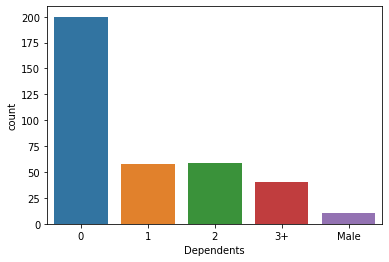

In [74]:
sns.countplot(data=sol, x="Dependents")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

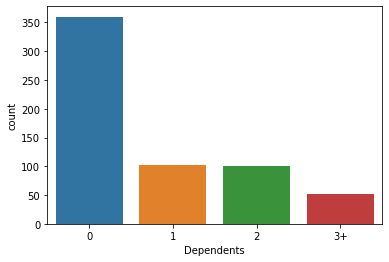

In [75]:
sns.countplot(data=data, x="Dependents")

In [76]:
sol.replace()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     Male     Yes          0      Graduate            No             5720   
1     Male     Yes          1      Graduate            No             3076   
2     Male     Yes          2      Graduate            No             5000   
3     Male     Yes          2      Graduate            No             2340   
4     Male      No          0  Not Graduate            No             3276   
..     ...     ...        ...           ...           ...              ...   
362   Male     Yes         3+  Not Graduate           Yes             4009   
363   Male     Yes          0      Graduate            No             4158   
364   Male      No          0      Graduate            No             3250   
365   Male     Yes          0      Graduate            No             5000   
366   Male      No          0      Graduate           Yes             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0       110.0             360.0             1.0   
1                 1500       126.0             360.0             1.0   
2                 1800       208.0             360.0             1.0   
3                 2546       100.0             360.0             1.0   
4                    0        78.0             360.0             1.0   
..                 ...         ...               ...             ...   
362               1777       113.0             360.0             1.0   
363                709       115.0             360.0             1.0   
364               1993       126.0             360.0             1.0   
365               2393       158.0             360.0             1.0   
366                  0        98.0             180.0             1.0   

    Property_Area  
0           Urban  
1           Urban  
2           Urban  
3           Urban  
4           Urban  
..            ...  
362         Urban  
363         Urban  
364     Semiurban  
365         Rural  
366         Rural  

[367 rows x 11 columns]

In [77]:
sol['Dependents'].replace("Male","0", inplace=True)

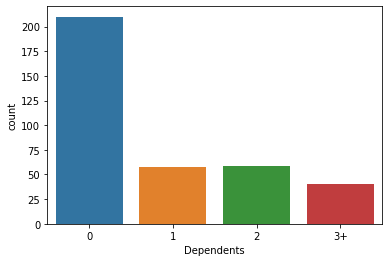

In [78]:
sns.countplot(data=sol, x="Dependents")
plt.show()

In [79]:
sol.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [80]:
sol1 = pd.get_dummies(sol)

In [81]:
sol1

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
3               2340               2546       100.0             360.0   
4               3276                  0        78.0             360.0   
..               ...                ...         ...               ...   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               1.0              0            1           0            1   
1               1.0              0            1           0            1   
2               1.0              0            1           0            1   
3               1.0              0            1           0            1   
4               1.0              0            1           1            0   
..              ...            ...          ...         ...          ...   
362             1.0              0            1           0            1   
363             1.0              0            1           0            1   
364             1.0              0            1           1            0   
365             1.0              0            1           0            1   
366             1.0              0            1           1            0   

     Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0               1             0             0              0   
1               0             1             0              0   
2               0             0             1              0   
3               0             0             1              0   
4               1             0             0              0   
..            ...           ...           ...            ...   
362             0             0             0              1   
363             1             0             0              0   
364             1             0             0              0   
365             1             0             0              0   
366             1             0             0              0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                     1                       0                 1   
1                     1                       0                 1   
2                     1                       0                 1   
3                     1                       0                 1   
4                     0                       1                 1   
..                  ...                     ...               ...   
362                   0                       1                 0   
363                   1                       0                 1   
364                   1                       0                 1   
365                   1                       0                 1   
366                   1                       0                 0   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                    0                    0                        0   
1                    0                    0                        0   
2                    0                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   
..                 ...                  ...                      ...   
362                  1                    0                        0   
363                  0                   

In [85]:
# rfc.predict(sol1)

In [86]:
# Loan_ID.to_numpy()

In [88]:
pd.DataFrame({"Loan_ID": Loan_ID.to_numpy(),
             "Loan_Status": rfc.predict(sol1)}).to_csv('result.csv')